![Year in Data header](images/header.png)

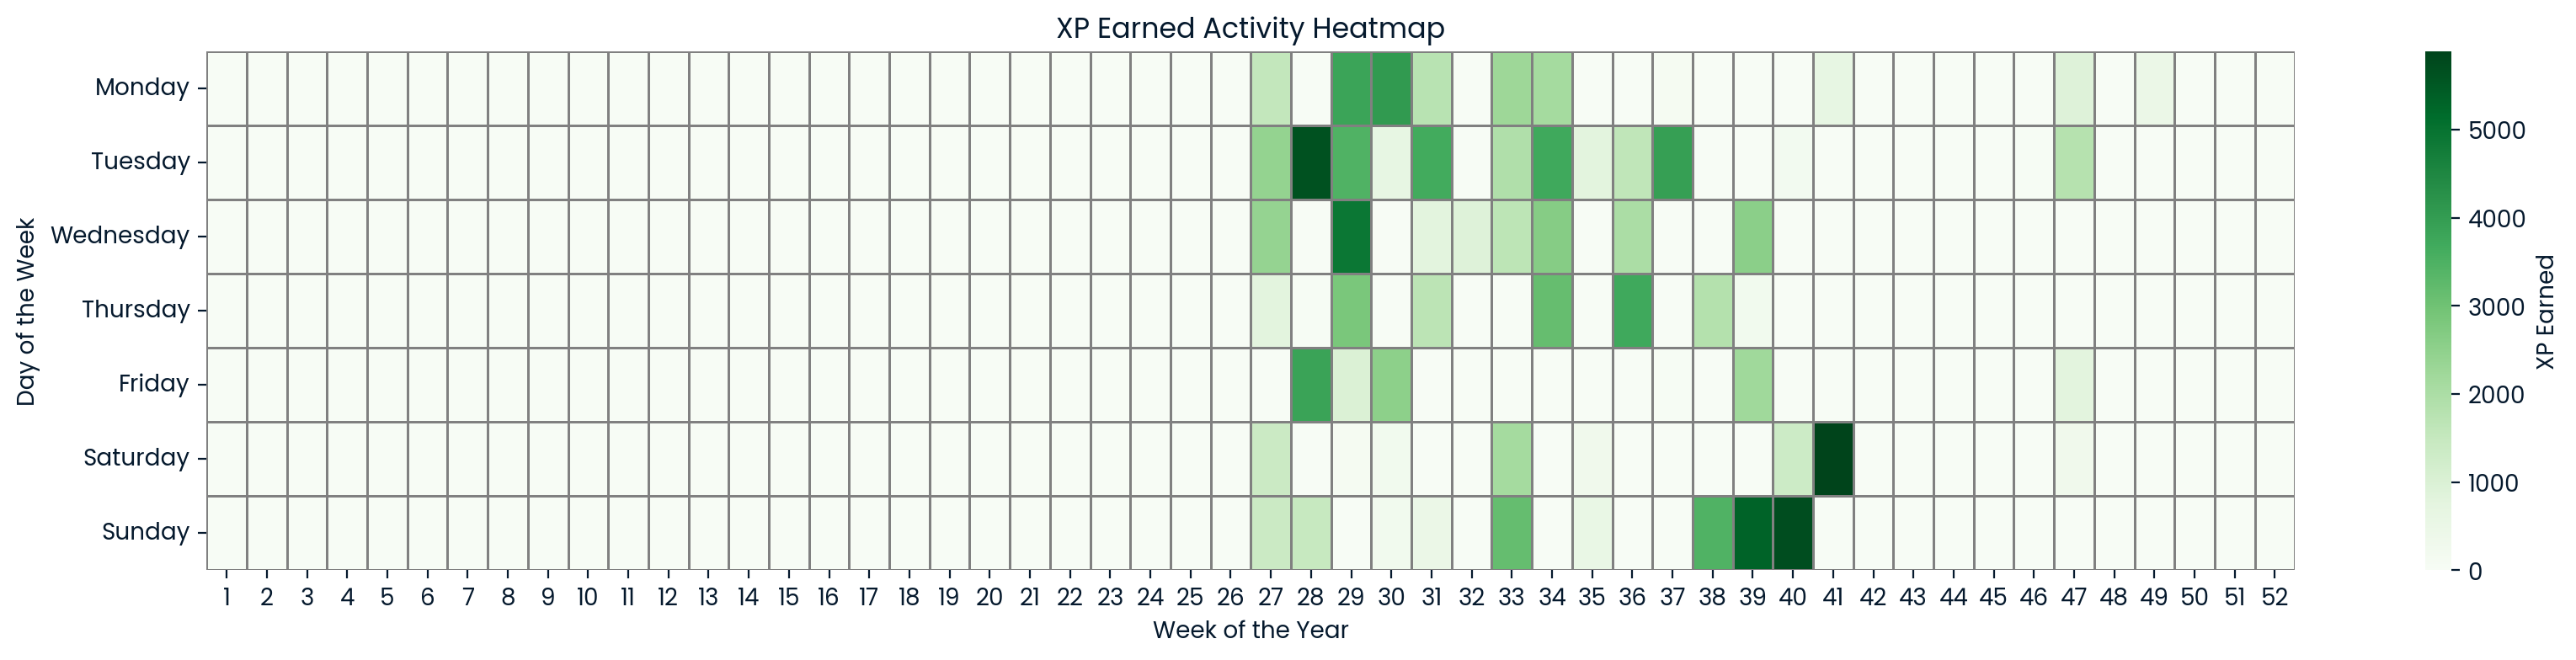

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the data
xp_earned = pd.read_csv('data/xp_earned.csv', parse_dates=['earned_at'])

# Ensure the 'date' column is in datetime format
xp_earned['date'] = pd.to_datetime(xp_earned['earned_at'])

# Create columns for week number and day of the week
xp_earned['week'] = xp_earned['earned_at'].dt.isocalendar().week
xp_earned['day'] = xp_earned['earned_at'].dt.dayofweek

# Create a DataFrame to ensure all days and weeks are represented
all_weeks = range(1, 53)  # Weeks 1 to 52
all_days = range(0, 7)    # Days 0 (Monday) to 6 (Sunday)
full_index = pd.MultiIndex.from_product([all_days, all_weeks], names=['day', 'week'])

# Sum XP earned for each day and week, reindex to fill missing values with 0
heatmap_data = xp_earned.pivot_table(index='day', columns='week', values='xp_amount', aggfunc='sum', fill_value=0)
heatmap_data = heatmap_data.reindex(index=all_days, columns=all_weeks, fill_value=0)

# Create the heatmap
plt.figure(figsize=(20, 4))
sns.heatmap(heatmap_data, cmap='Greens', linewidths=.5, linecolor='gray', cbar_kws={'label': 'XP Earned'})

# Set the labels
plt.title('XP Earned Activity Heatmap', loc='center')
plt.xlabel('Week of the Year')
plt.ylabel('Day of the Week')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)

# Display the heatmap
plt.show()

In [4]:
xp_earned = pd.read_csv('data/xp_earned.csv', parse_dates=['earned_at'])
xp_earned.head(20)

## complete challenge 1, be ambitious

,earned_at,xp_amount
0,2025-09-09 13:40:33+00:00,100
1,2025-07-16 16:23:04+00:00,100
2,2025-07-13 23:18:44+00:00,25
3,2025-09-04 21:53:16+00:00,50
4,2025-10-04 23:33:50+00:00,50
5,2025-07-01 14:00:25+00:00,250
6,2025-08-18 16:41:48+00:00,25
7,2025-07-05 21:14:55+00:00,100
8,2025-07-18 01:14:20+00:00,50
9,2025-11-21 01:54:12+00:00,50


In [5]:
xp_earned_sorted = xp_earned.sort_values(by='xp_amount', ascending=False)
xp_earned_sorted.head()

,earned_at,xp_amount
660,2025-07-21 20:17:19+00:00,1500
1420,2025-07-21 16:10:35+00:00,1500
167,2025-07-08 17:15:13+00:00,1500
1333,2025-10-11 17:26:12+00:00,1500
1610,2025-07-02 14:45:14+00:00,250


In [6]:
# Extract hour, day, & month from the timestamp
xp_earned_sorted['earned_at'] = pd.to_datetime(xp_earned_sorted['earned_at'])
xp_earned_sorted['hour'] = xp_earned_sorted['earned_at'].dt.hour
xp_earned_sorted["day_of_week"] = xp_earned_sorted["earned_at"].dt.day_name().str[:3]
xp_earned_sorted['month'] = xp_earned_sorted['earned_at'].dt.month_name().str[:3]
xp_earned_sorted.head(10)

,earned_at,xp_amount,hour,day_of_week,month
660,2025-07-21 20:17:19+00:00,1500,20,Mon,Jul
1420,2025-07-21 16:10:35+00:00,1500,16,Mon,Jul
167,2025-07-08 17:15:13+00:00,1500,17,Tue,Jul
1333,2025-10-11 17:26:12+00:00,1500,17,Sat,Oct
1610,2025-07-02 14:45:14+00:00,250,14,Wed,Jul
208,2025-10-05 18:11:58+00:00,250,18,Sun,Oct
1297,2025-07-08 21:46:59+00:00,250,21,Tue,Jul
5,2025-07-01 14:00:25+00:00,250,14,Tue,Jul
378,2025-07-01 04:08:27+00:00,250,4,Tue,Jul
41,2025-07-26 20:52:17+00:00,250,20,Sat,Jul


In [7]:
# map time of the day based 
xp_earned_sorted['time_of_day'] = pd.cut(
    xp_earned_sorted["hour"],
    bins=[-1, 4, 11, 16, 21, 23],
    labels=["Night", "Morning", "Afternoon", "Evening", "Late Night"], 
)
xp_earned_sorted.head(20)

,earned_at,xp_amount,hour,day_of_week,month,time_of_day
660,2025-07-21 20:17:19+00:00,1500,20,Mon,Jul,Evening
1420,2025-07-21 16:10:35+00:00,1500,16,Mon,Jul,Afternoon
167,2025-07-08 17:15:13+00:00,1500,17,Tue,Jul,Evening
1333,2025-10-11 17:26:12+00:00,1500,17,Sat,Oct,Evening
1610,2025-07-02 14:45:14+00:00,250,14,Wed,Jul,Afternoon
208,2025-10-05 18:11:58+00:00,250,18,Sun,Oct,Evening
1297,2025-07-08 21:46:59+00:00,250,21,Tue,Jul,Evening
5,2025-07-01 14:00:25+00:00,250,14,Tue,Jul,Afternoon
378,2025-07-01 04:08:27+00:00,250,4,Tue,Jul,Night
41,2025-07-26 20:52:17+00:00,250,20,Sat,Jul,Evening


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Aggregate total points by time_of_day and day_of_week
points_by_time_day = xp_earned_sorted.groupby(
    ["time_of_day", "day_of_week"]
)["xp_amount"].sum().reset_index()

In [9]:
time_order = ["Morning", "Afternoon", "Evening", "Night"]
days_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

points_by_time_day["time_of_day"] = pd.Categorical(points_by_time_day["time_of_day"], categories=time_order, ordered=True)
points_by_time_day["day_of_week"] = pd.Categorical(points_by_time_day["day_of_week"], categories=days_order, ordered=True)


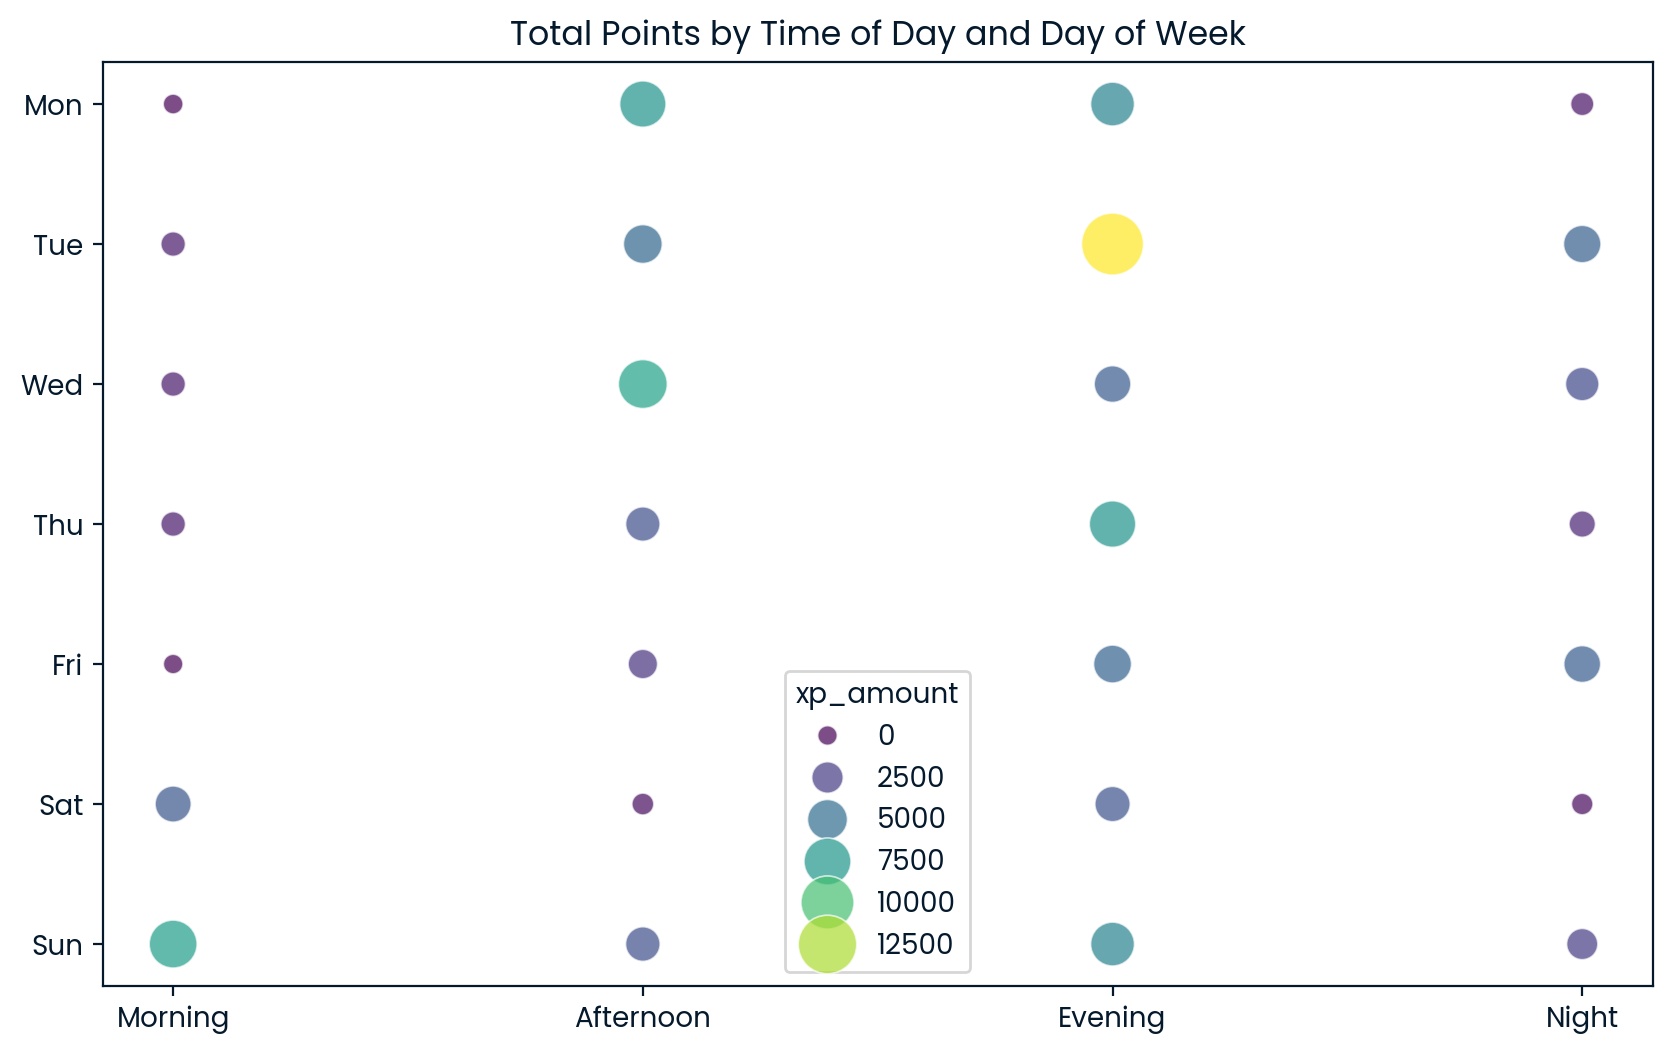

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=points_by_time_day,
    y="day_of_week", x="time_of_day",
    size="xp_amount",
    sizes=(50, 500), 
    hue="xp_amount",
    palette="viridis",
    alpha=0.7
)
plt.title("Total Points by Time of Day and Day of Week")
plt.xlabel("")
plt.ylabel("")
plt.grid(False)
plt.show()

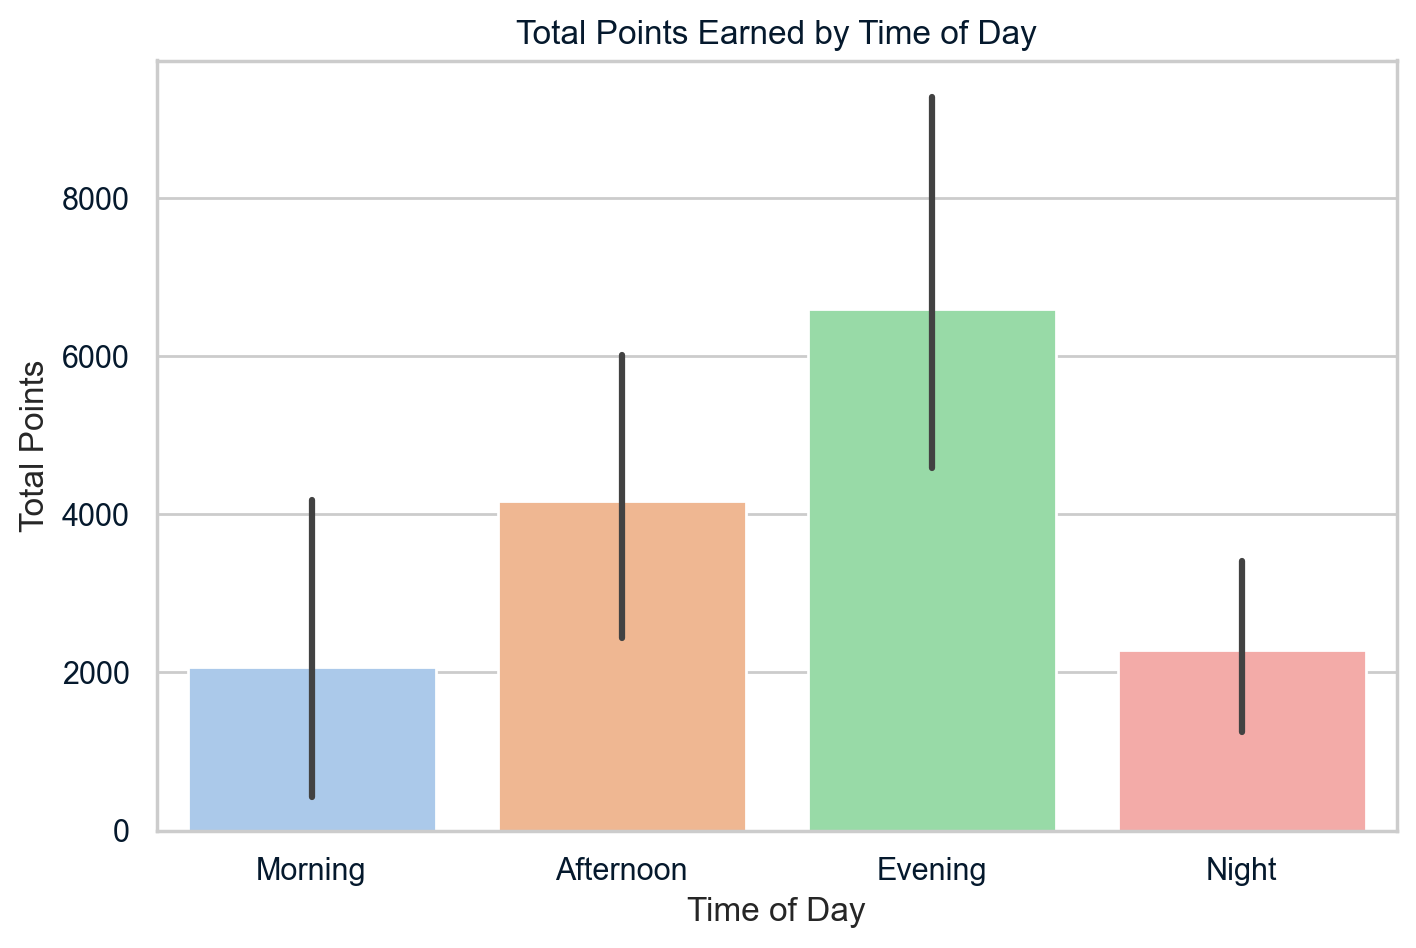

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

sns.barplot(
    data=points_by_time_day,
    x="time_of_day",
    y="xp_amount",
    order=["Morning", "Afternoon", "Evening", "Night"],
    palette="pastel"
)

plt.title("Total Points Earned by Time of Day")
plt.ylabel("Total Points")
plt.xlabel("Time of Day")
plt.show()

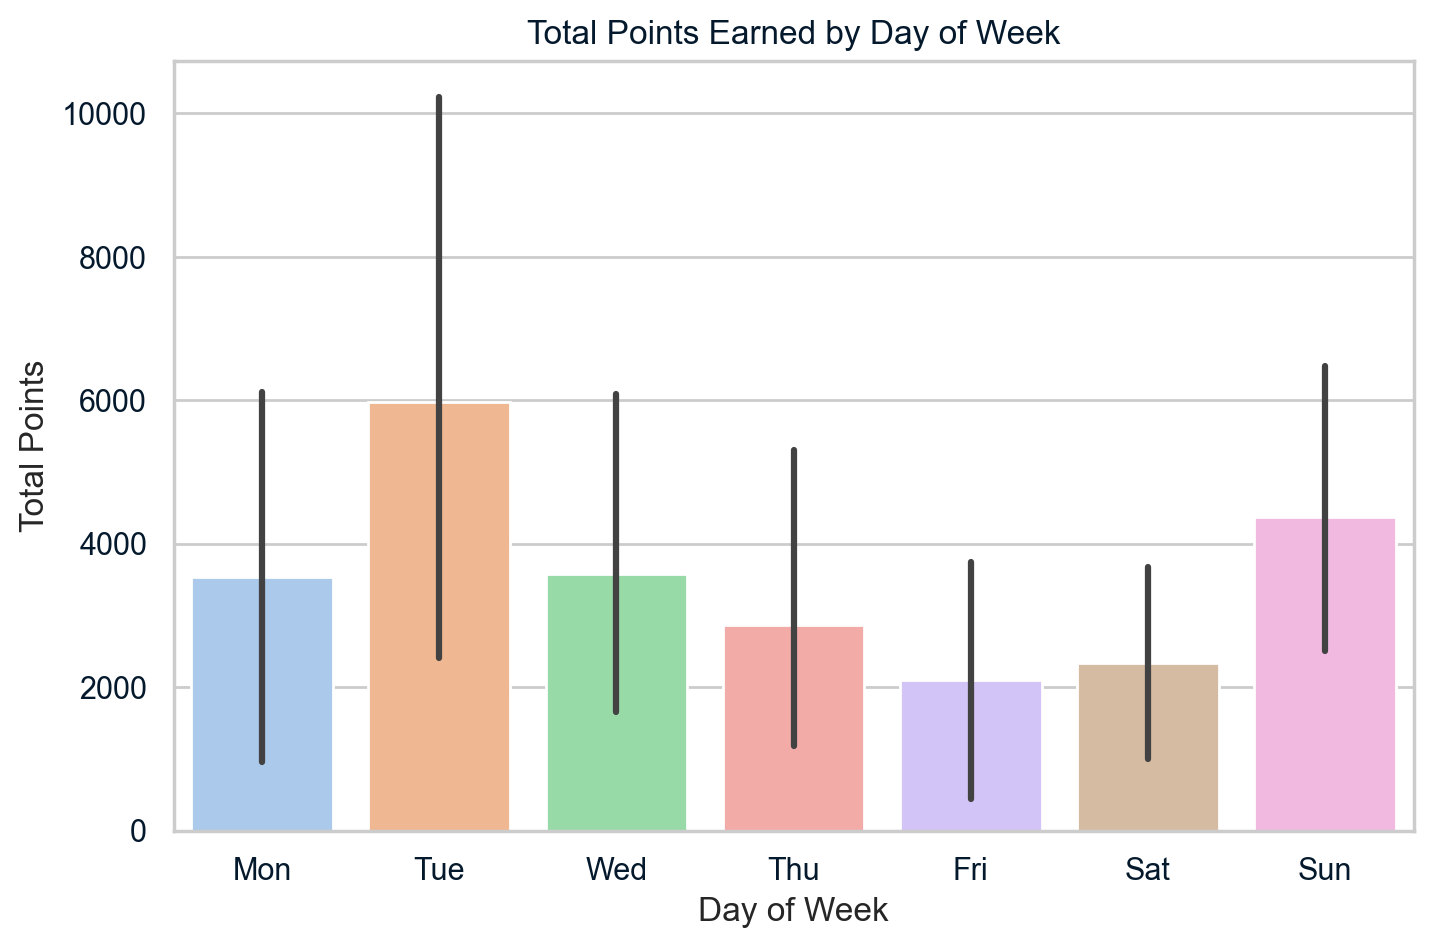

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

sns.barplot(
    data=points_by_time_day,
    x="day_of_week",
    y="xp_amount",
    palette="pastel"
)

# Reorder x-axis after plotting
plt.xticks(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

plt.title("Total Points Earned by Day of Week")
plt.ylabel("Total Points")
plt.xlabel("Day of Week")
plt.show()

In [13]:
streaks = pd.read_csv('data/streaks.csv', parse_dates=['streak_started_at', 'streak_ended_at'])
streaks.head()

longest_streak = streaks.loc[streaks['nb_days'].idxmax()]
longest_streak

## complete challenge 2, be curious

streak_started_at    2025-06-30 15:47:38
streak_ended_at      2025-08-03 20:36:17
nb_days                               25
Name: 11, dtype: object

In [14]:
learning_minutes = pd.read_csv('data/learning_minutes.csv', parse_dates=['date'])
learning_minutes.head()

## complete challenge 3, be creative

,date,total_duration_in_minutes
0,2025-09-05 00:00:00+00:00,0.083333
1,2025-06-30 00:00:00+00:00,109.237400
2,2025-11-15 00:00:00+00:00,1.670150
3,2025-07-12 00:00:00+00:00,0.441117
4,2025-10-06 00:00:00+00:00,24.346450


In [15]:
learning_minutes['day_of_week'] = learning_minutes['date'].dt.day_name()

day_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]

learning_minutes['day_of_week'] = pd.Categorical(
    learning_minutes['day_of_week'],
    categories=day_order,
    ordered=True
)

learning_by_day_hours = (
    learning_minutes.groupby('day_of_week', observed=True)['total_duration_in_minutes'].sum().sort_values(ascending=False).div(60).round()
)

learning_by_day_hours

learning_by_day_hours.idxmax(), learning_by_day_hours.max()

('Tuesday', np.float64(28.0))

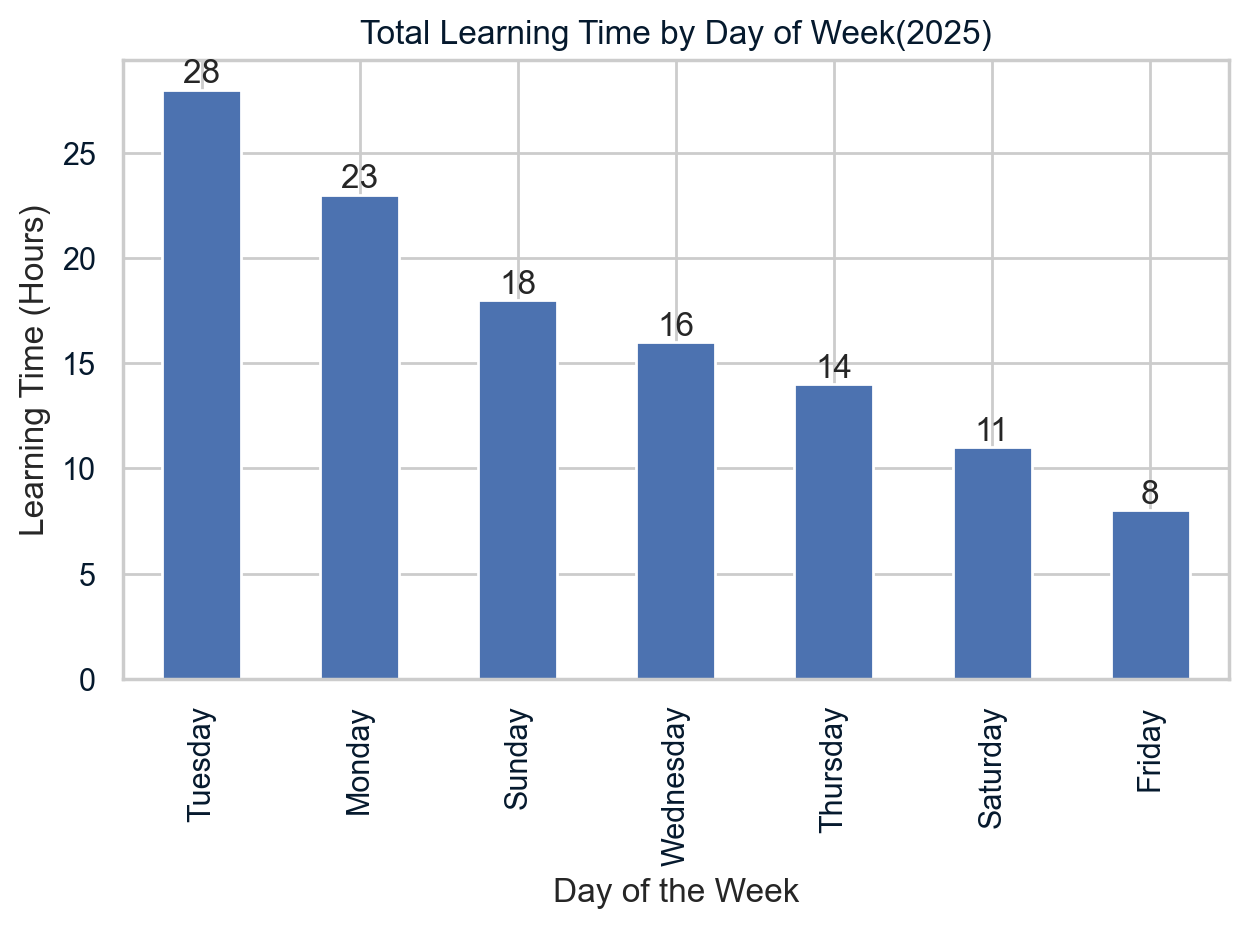

In [16]:
plt.figure()
ax = learning_by_day_hours.plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Day of the Week')
plt.ylabel('Learning Time (Hours)')
plt.title('Total Learning Time by Day of Week(2025)')

plt.tight_layout()
plt.show()

---

---

### Chapters completed

In [17]:
chapters_completed = pd.read_csv('data/chapters_completed.csv', parse_dates=['completed_at'])
chapters_completed.head()

,completed_at,chapter_title
0,2025-08-18 00:00:00+00:00,Visualizing Categorical Data
1,2025-09-28 00:00:00+00:00,Introduction to GitHub
2,2025-07-13 00:00:00+00:00,Record linkage
3,2025-08-11 00:00:00+00:00,Summary Statistics
4,2025-10-11 00:00:00+00:00,Introducing Inner Joins


In [29]:
# count of chapters completed
total_completed = len(chapters_completed)

print(f"Total chapters completed: {total_completed}")

Total chapters completed: 120


### Courses completed

In [19]:
courses_completed = pd.read_csv('data/courses_completed.csv', parse_dates=['completed_at'])
courses_completed.head()

,completed_at,course_title
0,2025-07-16 00:00:00+00:00,Python Toolbox
1,2025-11-18 00:00:00+00:00,Introduction to Relational Databases in SQL
2,2025-08-13 00:00:00+00:00,Introduction to Statistics in Python
3,2025-09-03 00:00:00+00:00,Experimental Design in Python
4,2025-10-11 00:00:00+00:00,Intermediate SQL


In [32]:
# count of courses completed
total_courses_completed = len(courses_completed)

print(f'total courses completed: {total_courses_completed}')

total courses completed: 32


### Exercises completed

In [20]:
exercises_completed = pd.read_csv('data/exercises_completed.csv', parse_dates=['completed_at'])
exercises_completed.head()

,completed_at,exercise_title
0,2025-10-06 00:00:00+00:00,GROUP BY single fields (2)
1,2025-08-13 00:00:00+00:00,Subtracting dates
2,2025-07-14 00:00:00+00:00,Pivot temperature by city and year
3,2025-07-08 00:00:00+00:00,Import package
4,2025-10-05 00:00:00+00:00,WHERE IN (2)


In [34]:
# count of exercises completed
total_exercises_completed = len(exercises_completed)

print(f'Total Exercises Completes: {total_exercises_completed}')

Total Exercises Completes: 2315


### Tracks completed

In [24]:
tracks_completed = pd.read_csv('data/tracks_completed.csv', parse_dates=['completed_at'])
tracks_completed.head()

,completed_at,track_title
0,2025-10-05 00:00:00+00:00,GitHub Foundations
1,2025-10-05 00:00:00+00:00,Data Science C4
2,2025-09-25 00:00:00+00:00,Associate Data Scientist in Python
